#  Linear Networks & Classification

###  **DSBA 6165: AI & Deep Learning**


## Goal

The goal of this lab activity is practicing to build a deep neural network class while variating different DNN components. For the practice, we use Energy efficiency Data Set dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/). 

In this lab, we are building deep neural network by subclassing keras.Model so we can variate the different parameterized contruction. 

## Loading Data

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling. 

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
import seaborn as sns


TF version: 2.18.0


### Energy Efficiency Dataset

You can download [ENB2012_data.xlsx](https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx). Click the link and take a look at the data before starting to work the following TODOs. 


<img src="https://miro.medium.com/max/1400/0*1TwLXhauaGFElF4c.webp" width=450 />


|  |  |  |  |  |  |
|---|---|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 768 | Area: | Computer |
| Attribute Characteristics: | Integer, Real | Number of Attributes: | 8 | Date Donated | 2012-11-30 |
| Associated Tasks: | Classification, Regression | Missing Values? | N/A | Number of Web Hits: | 447329 |


#### Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
* X1 Relative Compactness
* X2 Surface Area
* X3 Wall Area
* X4 Roof Area
* X5 Overall Height
* X6 Orientation
* X7 Glazing Area
* X8 Glazing Area Distribution
* y1 Heating Load
* y2 Cooling Load


#### Relevant Papers:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012



### TODO1
1. Copy the Energy Efficiency Dataset url from above and define the variable `data_url`.
1. Load the Energy Efficiency Dataset with the `data_url` provided above and store the output into `dfenergy` using pandas `read_csv`.
    1. Hint: Make sure to include the data url variable.
    1. Hint: Use the read_excel reference here: [link](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)
    1. Hint: Include colnames when loading the data.

In [18]:
# TODO: copy and paste the url here
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

# Feature names
colnames = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
            "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution",
            "Heating Load", "Cooling Load"]

# TODO: read the data
dfenergy = pd.read_excel(data_url, engine='openpyxl', names=colnames)

# display the dataframe
display(dfenergy)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Visualize the data
 Seaborn, a visualization library, helps to visualize data with many plotting functions. To understand how variables in a dataset are related to one another and how that relationship is dependent on other variables, we can run visual analysis. This helps to visualize the trends and identify various patterns in the dataset.
 
### TODO 2
1. Using the seaborn `pairplot` plot, visualize the relationship between the independent varaibles. 
  * Here, we want to plot distributions of each class, so use `dfenergy`.


  

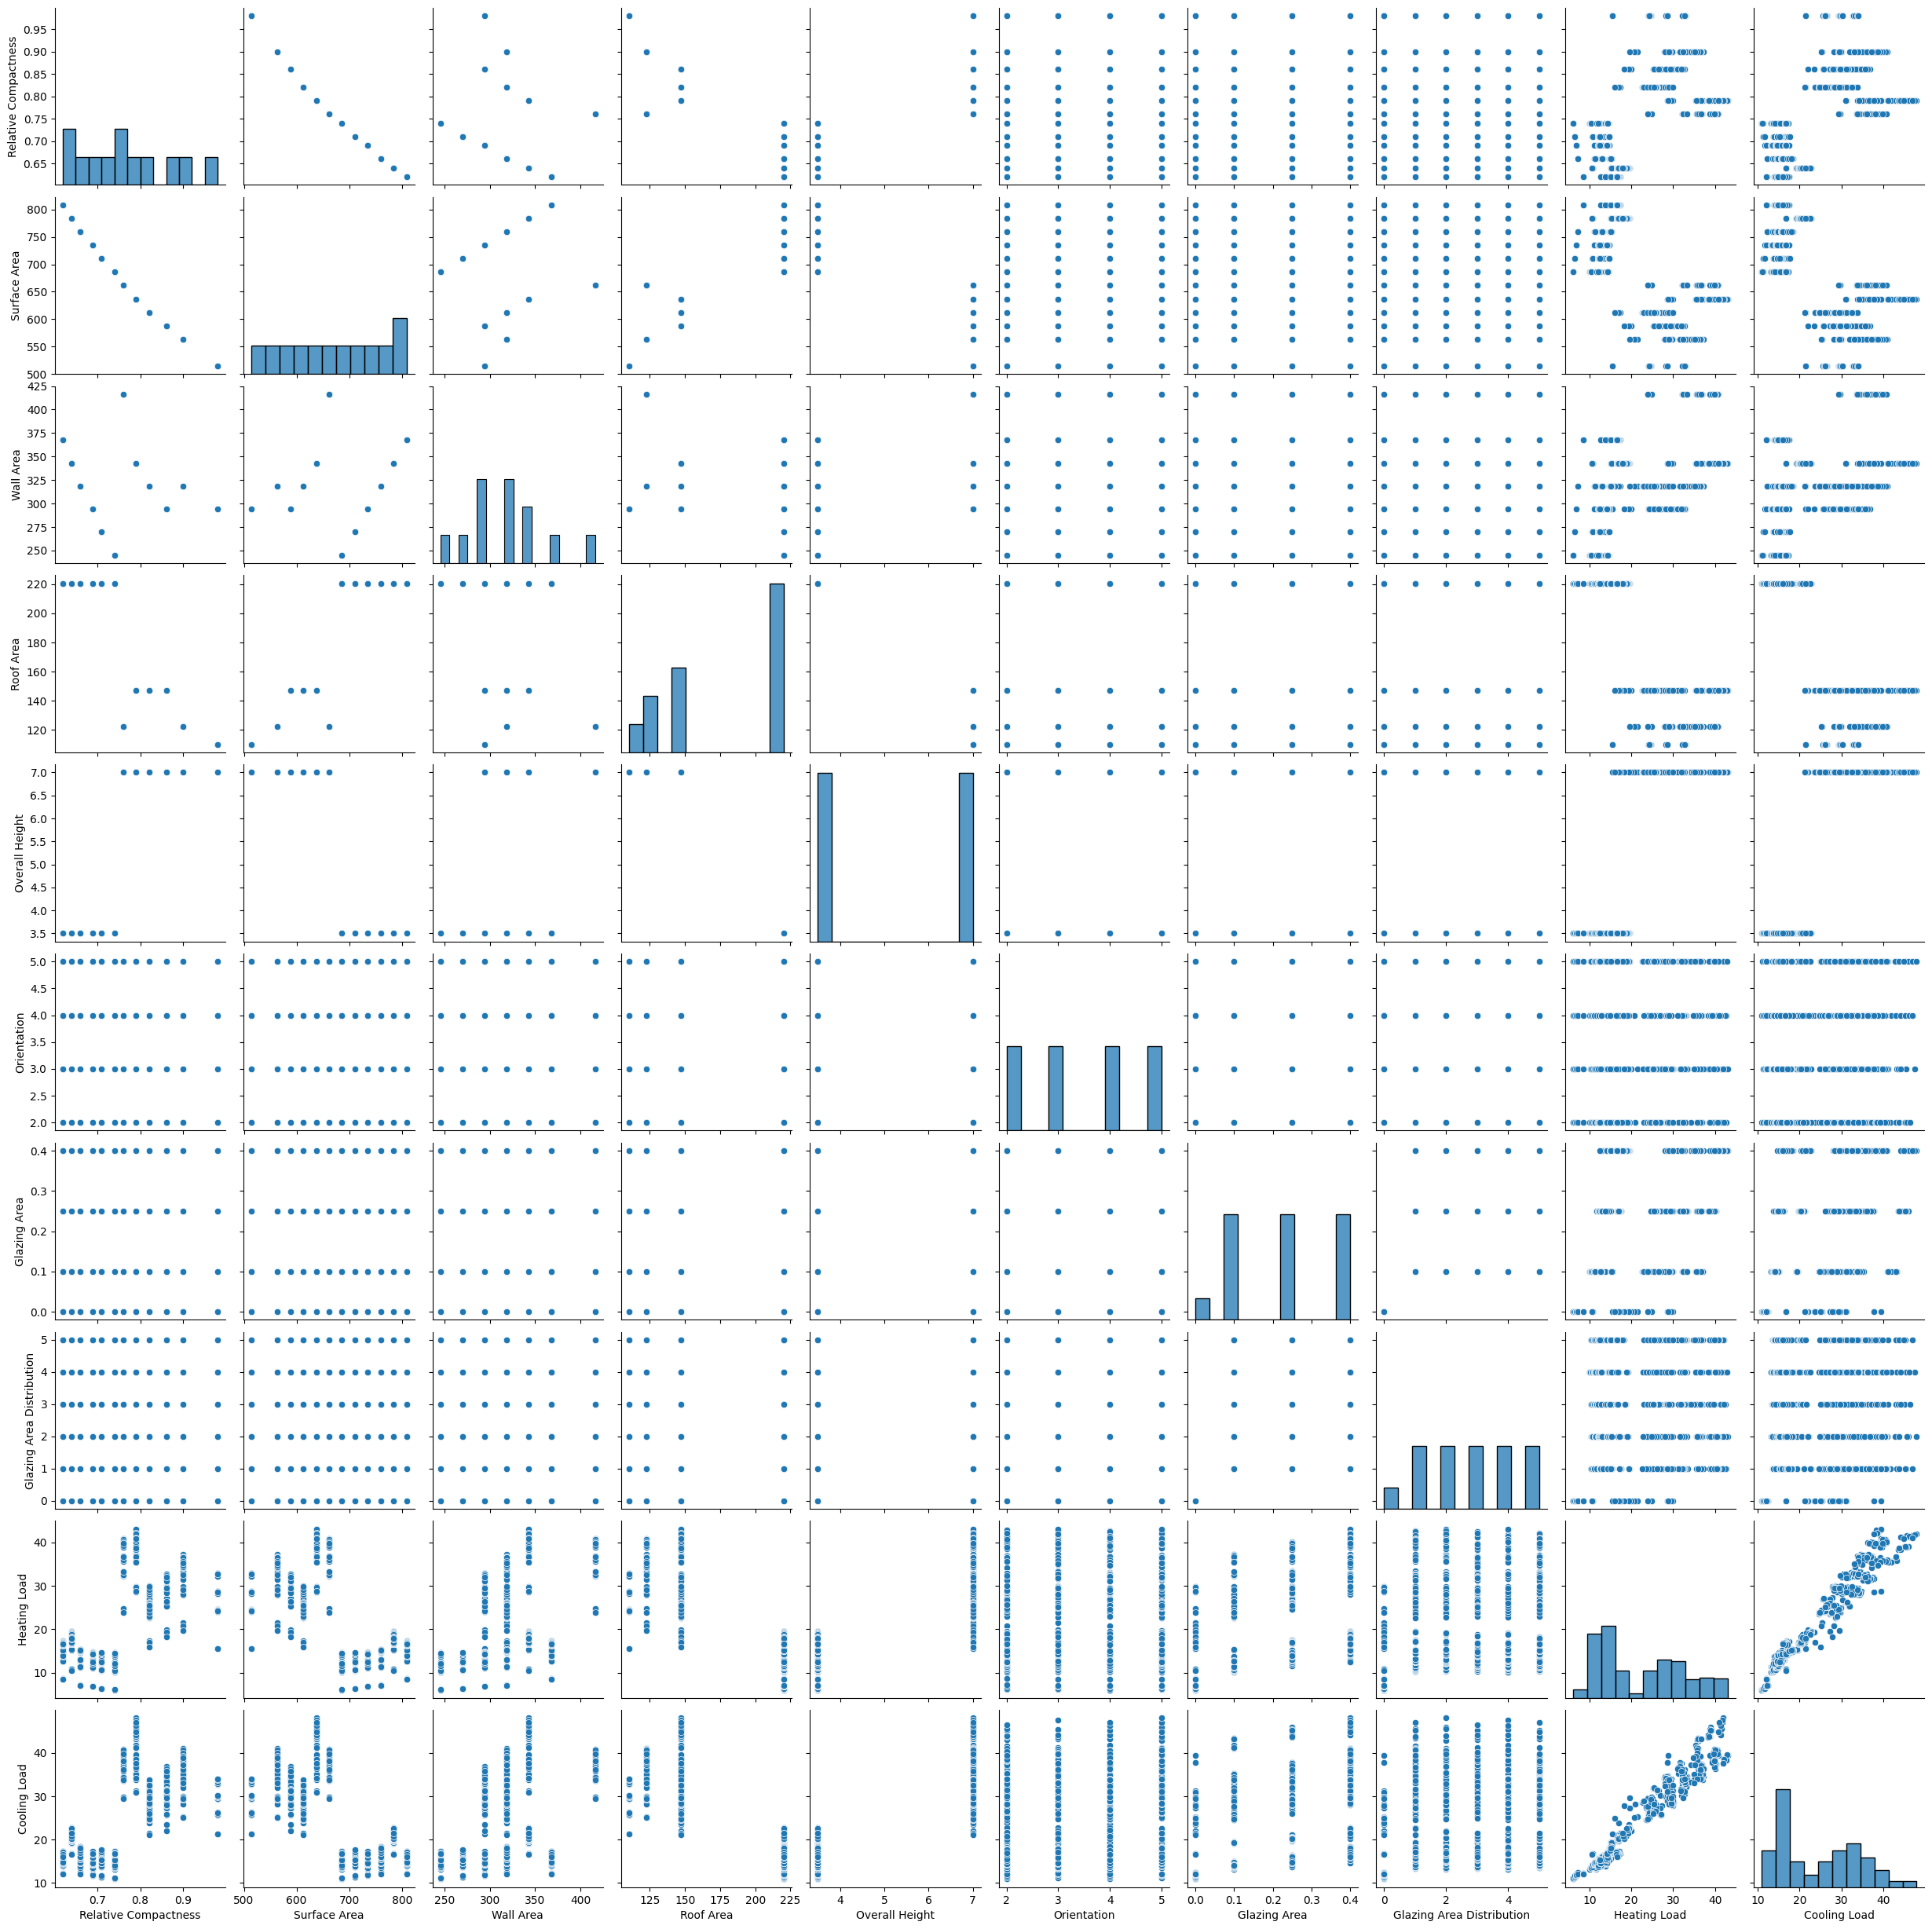

In [19]:
# TODO: you code here
sns.pairplot(dfenergy)

We also generally use heatmaps to learn more about the relationship between variables, find patterns, and discover correlations.

### TODO 2-1
1.  Using the seaborn `heatmap`, Generate the heatmap presenting [the correlation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) (`corr()`) between the independent variables. 
  1. Keep `annot` as 'True' and set the `fmt` parameter as '.2f'
  
* Refer the link for heatmap documentation: [link](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

<Figure size 1000x1000 with 0 Axes>

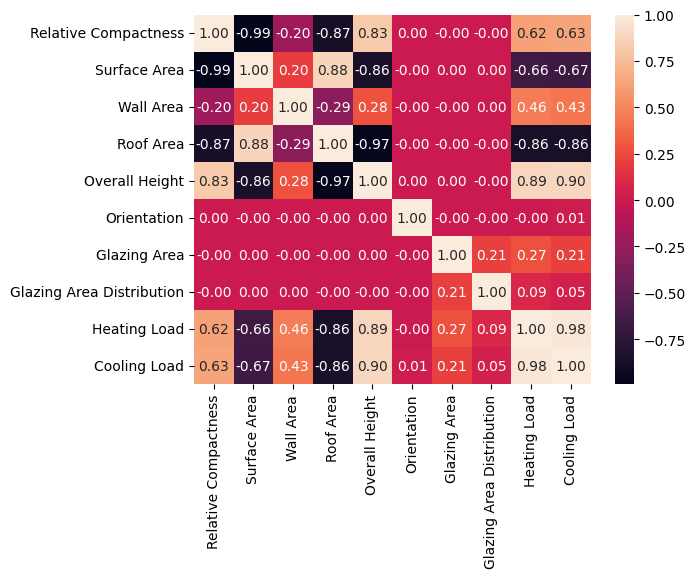

<Figure size 1000x1000 with 0 Axes>

In [20]:
sns.heatmap(dfenergy.corr(),annot=True, fmt='.2f')
plt.figure(figsize=(10,10))


## Data Split




Now we have to split the training and testing data because it allows us to estimate the model's performance on new data and ensure that the model is not overfitting, which is when a model performs well on the training data but poorly on new data. By evaluating the model's performance on unseen data, we can get a better understanding of how well the model will perform when used in practice.


### TODO 3
1.Split the data now into 20% for testing and 80% for training, and used the previous lab code file as a reference.
1. Slice the label class to create `x_train`, `x_test`, `y_train`, and `y_test`.


In [21]:
df_data = dfenergy.copy()

train_data = df_data.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
test_data = df_data.drop(train_data.index)


x_train = train_data.copy()
x_test = test_data.copy()

class_columns = ['Heating Load', 'Cooling Load']


y_train = x_train[class_columns]
y_test = x_test[class_columns]

x_train = x_train.drop(columns=class_columns)
x_test = x_test.drop(columns=class_columns)



In [22]:
display(x_train)
display(x_test)
display(y_train)
display(y_test)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
661,0.66,759.5,318.5,220.50,3.5,3,0.4,3
122,0.74,686.0,245.0,220.50,3.5,4,0.1,2
113,0.79,637.0,343.0,147.00,7.0,3,0.1,2
14,0.82,612.5,318.5,147.00,7.0,4,0.0,0
529,0.98,514.5,294.0,110.25,7.0,3,0.4,1
...,...,...,...,...,...,...,...,...
25,0.74,686.0,245.0,220.50,3.5,3,0.0,0
110,0.82,612.5,318.5,147.00,7.0,4,0.1,2
149,0.90,563.5,318.5,122.50,7.0,3,0.1,3
152,0.86,588.0,294.0,147.00,7.0,2,0.1,3


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
9,0.86,588.0,294.0,147.0,7.0,3,0.0,0
11,0.86,588.0,294.0,147.0,7.0,5,0.0,0
19,0.79,637.0,343.0,147.0,7.0,5,0.0,0
23,0.76,661.5,416.5,122.5,7.0,5,0.0,0
28,0.71,710.5,269.5,220.5,3.5,2,0.0,0
...,...,...,...,...,...,...,...,...
746,0.74,686.0,245.0,220.5,3.5,4,0.4,5
753,0.69,735.0,294.0,220.5,3.5,3,0.4,5
754,0.69,735.0,294.0,220.5,3.5,4,0.4,5
759,0.66,759.5,318.5,220.5,3.5,5,0.4,5


,Heating Load,Cooling Load
661,15.18,17.63
122,10.32,13.57
113,37.26,34.62
14,16.95,21.16
529,32.26,33.34
...,...,...
25,6.05,11.19
110,23.67,24.80
149,29.01,32.85
152,25.41,31.73


,Heating Load,Cooling Load
9,19.95,21.97
11,18.31,27.87
19,28.75,39.44
23,23.93,29.40
28,6.37,11.27
...,...,...
746,14.17,16.94
753,14.28,15.87
754,14.37,16.54
759,15.16,18.06


In [23]:
df_data.describe().transpose()[['mean','std']] 

,mean,std
Relative Compactness,0.764167,0.105777
Surface Area,671.708333,88.086116
Wall Area,318.500000,43.626481
Roof Area,176.604167,45.165950
Overall Height,5.250000,1.751140
Orientation,3.500000,1.118763
Glazing Area,0.234375,0.133221
Glazing Area Distribution,2.812500,1.550960
Heating Load,22.307195,10.090204
Cooling Load,24.587760,9.513306


In [24]:
## Convert to tensors
x_train = tf.convert_to_tensor(x_train.values, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

## Normalization

When variables are measured at different scales, they often do not contribute equally to the analysis. By normalizing the variables, we can be sure that each variable contributes equally to the analysis. Standardization is a way to normalize the data as
$$ \tilde{x} = \frac{(x - \mu)}{\sigma}$$
where $x$ is the input data, $\mu$ is the mean value of the data, $\sigma$ is the standard deviation of the data, and $\tilde{x}$ is the normalized data.

In lab 2 we have seen variables having different ranges. If features have significantly different ranges, some features may dominate others during training.
In summary, normalization is an important preprocessing step in many machine learning algorithms, as it helps to standardize the data, improve convergence, reduce the influence of outliers, prevent overfitting, and make the features more interpretable.

After standardizing both features and target variables using the training set statistics, all variables are centered around zero with a standard deviation of 1 in the training set, while the test set shows expected slight deviations from these values, indicating proper scaling without data leakage.

## Multilayer Perceptrons

Now we are building a class for MLP model.

Classes provide a useful way of combining data and functionality. The modularity of classes enables effective troubleshooting, code reuse, and problem-solving. For example, if your code breaks, you will be able to point to a specific class or class method without having to sift through much else code.

Now we are going to build a class for our MLP model which should takes input data and outputs predictions. 
Subclassing the `keras.Model`, we define `MLP` class. We override the construct `__init__` to have the following arguments: `X` (input data), `n_output` (number of outputs), `n_hidden` (number of hidden units), and `activ` (the activation function to use). 

You can refer to this link for subclass creating examples: [link](https://keras.io/api/models/model/)


### TODO 4
1. create an instance of the normalizer layer with self, and adapts it to the input data. #Refer to lab 2 for normalization
1. create the sequential network add first layer as normalizer using self 
   add two dense layer one for hidden units and one for output 
   add finally network should be summarized with "self.net.summary()".
1. Create "call" which should performs the forward pass of the network, taking the "input" as an argument and it should return the predictions made by the network.

In [25]:
class MLP(keras.Model):
    """ Multilayer Perceptron class 
    
        attributes
        ===========
        net     Sequential
                network built with keras.Sequential
    """
    
    def __init__(self, X, n_output, n_hidden, activ='relu'):
        super().__init__()
        # TODO: normalization
        self.normalizer = keras.layers.Normalization(axis=-1)
        self.normalizer.adapt(X)
        
        # TODO: build a neural networks
       
        self.net = keras.Sequential([
            keras.Input(shape=(8,)),
            self.normalizer,
            keras.layers.Dense(n_hidden, activation=activ),
            keras.layers.Dense(n_output, activation=activ)
        ])
        
        self.net.summary()
        
            
    def call(self, input):
        # TODO: forward pass
        x = self.net(input)
        return x
    


In [26]:
y_train.shape

TensorShape([614, 2])

### TODO 4-1
1. Create a model using the MLP that was created above.
    1. Hint: no of output will be your no of dependent variables
    1. Hint: n_hidden is your hidden units
    

In [27]:
# TODO: build a model
model = MLP(x_train, n_output =2, n_hidden=64)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 723 (2.83 KB)

 Trainable params: 706 (2.76 KB)

 Non-trainable params: 17 (72.00 B)

## Adam Optimizer

The main goal of Adam optimizer is to combine two techniques, momentum and rms prop.
With the help of momentum, we get smoothing, and with the help of rms prop, we can change learning rate in an efficient manner so that alpha rate does not go too high. As a result, they collaborated to create Adam optimizer.
reference here: [link](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

In [28]:
# custom metrics 
# code from https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square( y_true-y_pred )) 
    SS_tot = tf.reduce_sum(tf.square( y_true - tf.reduce_mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + tf.keras.backend.epsilon()) )

### TODO4-2
1. Using `compile`, prepare your model to have "Adam" as an optimizer with "learning_rate" 0.01 and have a loss function to be "mean squared error" and metrics as mse , mae and coeff_determination which we have defined above.

In [29]:
# TODO: compile with three metrics 
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.01),
    loss = keras.losses.MeanSquaredError(), 
    metrics = [
        keras.metrics.MeanSquaredError, 
        keras.metrics.MeanAbsoluteError, 
        coeff_determination
        ]

)



### TODO4-3
1. Using `fit`, train the model with training data (`x_train` and `y_train`). Train the model for `300 epochs` keeping "verbose" turned off (0), and "validation_split" be 20%.

In [ ]:
%time

# TODO: train

history = model.fit(
    x_train, 
    y_train, 
    epochs=300, 
    verbose=0, 
    validation_split=0.2
    )



CPU times: total: 0 ns
Wall time: 0 ns


### TODO4-4
1. Create `plot_learning` function that plots the training and validation loss learning curve using the `history` argument. You can also refer to the previous lab session to complete this function.

In [ ]:
# TODO
def plot_learning(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    return plt.show()




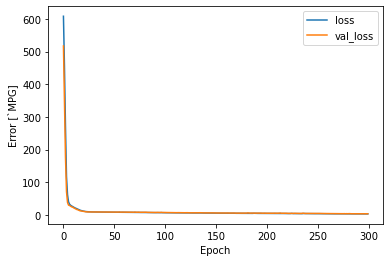

In [ ]:
#TODO
plot_learning(history)

### TODO4-5
1. `evaluate` the model on test data (`x_test` and `y_test`). 

In [ ]:
# TODO:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 913us/step - loss: 3.7217 - mse: 3.7217 - mae: 1.4120 - coeff_determination: 0.9589


[3.721653938293457, 3.721653938293457, 1.4119975566864014, 0.9589065313339233]


### TODO4-6
1. predict the model on test data (`x_test`) using `predict` function. 

In [ ]:
# TODO: 
y_pred = model.predict(x_test)

y_pred = pd.DataFrame(y_pred, columns=['Heating Load', 'Cooling Load'])

y_test = np.array(y_test_original)
y_pred = np.array(y_pred_original)

heating_comparison = np.vstack((
    y_test[:, 0],    
    y_pred[:, 0]     
)).T


cooling_comparison = np.vstack((
    y_test[:, 1],    
    y_pred[:, 1]     
)).T

5/5 [==============================] - 0s 814us/step


In [ ]:
print(heating_comparison)
print(cooling_comparison)

array([[19.95      , 18.37865448],
       [18.31      , 18.30713654],
       [28.75      , 28.64971542],
       [23.93      , 23.88285637],
       [ 6.37      ,  6.07958126],
       [ 6.85      ,  6.03020954],
       [ 7.18      ,  8.42982864],
       [10.54      ,  8.37808895],
       [10.77      ,  8.37570667],
       [10.56      ,  8.37739372],
       [ 8.5       ,  8.32395649],
       [29.87      , 26.83072853],
       [26.91      , 25.39870262],
       [26.37      , 25.49834442],
       [32.94      , 32.12127304],
       [10.36      , 10.39887524],
       [11.11      , 10.64749813],
       [11.09      , 10.91353703],
       [11.68      , 12.89749622],
       [11.7       , 13.16353321],
       [11.69      , 13.29655457],
       [15.21      , 13.29934406],
       [12.93      , 13.16910458],
       [13.02      , 13.46603107],
       [24.13      , 25.72559547],
       [24.25      , 25.68983841],
       [36.03      , 35.9031601 ],
       [32.41      , 32.44073868],
       [10.45      ,

## Visualisation

### TODO 5
Now we have to create a plot which have comparison between the actual target value and the predicted target value.
1. Plot the above numpy vertical stack array using plt.plot 
1. Use `plt.legend()` function to add a legend to the plot, with the title "target" and the labels "Label" and "Prediction".
1. Set Title using `plt.title()`, with the title being the name of the corresponding column in the y_train data.


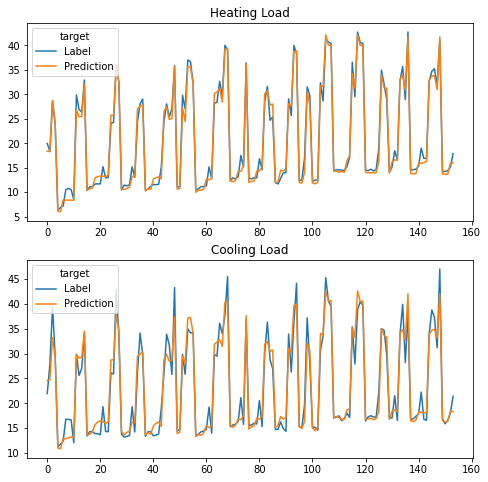

In [ ]:
 # TODO
plt.figure(figsize=(8,8))
comparisons = [heating_comparison, cooling_comparison]
titles = ['Heating Load', 'Cooling Load']
for i in range(2): #we are using for loop to plot 2 subplots in a single figure
    plt.subplot(2,1,i+1)
    plt.plot(comparisons[i][:,0], label='Label')  # actual values
    plt.plot(comparisons[i][:,1], label='Prediction')  # predicted values
    plt.title(titles[i])
    plt.legend()

plt.tight_layout()
    
    
    



### TODO5-1
Now creates a figure with a subplot of two histograms.
Refer to the above code to write for loop and 
1. Plot the above numpy vertical stack array using `sns.histplot` keep legend as "False"
1. Use `plt.legend()` function to add a legend to the plot, with the title "target" and the labels "Label" and "Prediction".:
1. Set Title using `plt.title()`, with the title being the name of the corresponding column in the y_train data.(Hint:Use i in the )


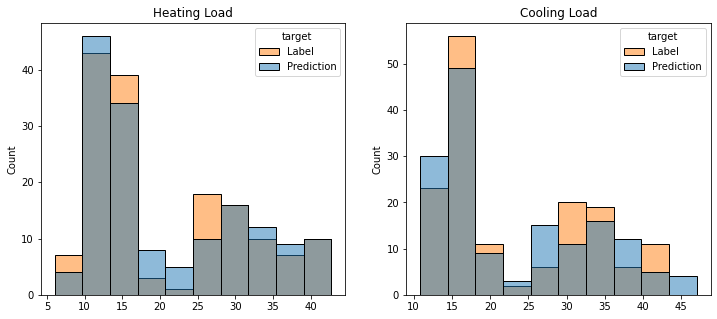

In [ ]:

plt.figure(figsize=(12,5))
# TODO: 
for i in range(2):
    plt.subplot(2, 1, i+1)
    sns.histplot(data=comparisons[i][:, 0], label='Label', legend=False)
    sns.histplot(data=comparisons[i][:, 1], label='Prediction', legend=False)
    plt.title(titles[i])
    plt.legend(title='target')
    
plt.tight_layout()

plt.show()



